In [1]:
import os

import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def get_moving_average(input_array, window_size=7):

    data_length = len(input_array)

    half_window_size = int((window_size - 1) / 2)

    window_average_cache = []

    for i in range(data_length):
        # if i < half_window_size:
        #     window_average_cache.append(input_array[i])
        temp = []
        for j in list(range(-int(window_size / 2), int(window_size / 2) + 1, 1)):
            try:
                out_index = i + j
                if out_index < 0:
                    temp.append(input_array[i])
                else:
                    temp.append(input_array[out_index])
            except Exception as e:
                pass
        window_average = np.nanmean(temp)
        window_average_cache.append(window_average)

    return window_average_cache


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - - - -
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - - - -
def round_number(num):
    """
    Rounds a number to the nearest 5 or 10, depending on the number's magnitude.

    Args:
        num (float): The number to be rounded.

    Returns:
        float: The rounded number.

    Example:
        >>> round_number(7)
        10.0
        >>> round_number(-13)
        -15.0
    """
    abs_num = abs(num)
    round_abs_num = round(abs_num, 1)

    while round_abs_num % 5 != 0 and round_abs_num < abs_num * 10:
        _temp = round(round_abs_num)
        _temp += 1
        round_abs_num = _temp

    if num < 0:
        result = -round_abs_num
    else:
        result = round_abs_num

    return result


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - - - -
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - - - -
def string_to_datetime(input_string):
    import sys
    from datetime import datetime

    string_len = len(input_string)  # YYYYMMDD ~ 8 letters
    if string_len < 8:
        sys.exit("Wrong format, must be YYYYMMDD, yours is {}".format(input_string))
    else:
        year = input_string[:4]
        month = input_string[4:6]
        day = input_string[6:]

    string_form = "{}/{}/{}".format(year, month, day)
    datetime_form = datetime.strptime(string_form, "%Y/%m/%d")
    return [string_form, datetime_form]

In [3]:
region_df = pd.read_excel(
    r"E:\010__SS3_TRY_MY_BEST_TO_SURVIVE_POSTPROCESSING\HSR_PROFILE_Manuscript\AlongTrackProfile\station_region_092022.xlsx"
)
end_km = region_df["END_KM"].values
district_name = region_df["DISTRICT"].values
end_km

array([ 0.  ,  5.9 ,  8.45, 11.9 , 21.25, 30.05, 35.9 , 42.55, 49.05])

In [4]:
mainfolder = r"E:\012_HOPE_TO_PUBLISH_PAPER\PROCESS_023\15_CALIBRATION_v003\HSR_PROFILE_Manuscript\AlongTrackProfile\PSC_CSV_Export"
folder2savefigure = r"E:\012_HOPE_TO_PUBLISH_PAPER\PROCESS_023\15_CALIBRATION_v003\HSR_PROFILE_Manuscript\AlongTrackProfile\PSC_PlotGraph"

if not os.path.exists(folder2savefigure):
    os.makedirs(folder2savefigure)

PSC_average_cdis_filepath = os.path.join(
    mainfolder, "Mean_Output_BUFFER_HSR_Segment_50m_TWD97.xlsx"
)
PSC_stdev_cdis_filepath = os.path.join(mainfolder, "Stdev_Output_BUFFER_HSR_Segment_50m_TWD97.xlsx")

PSC_average_cdis_data = pd.read_excel(PSC_average_cdis_filepath)
PSC_stdev_cdis_data = pd.read_excel(PSC_stdev_cdis_filepath)

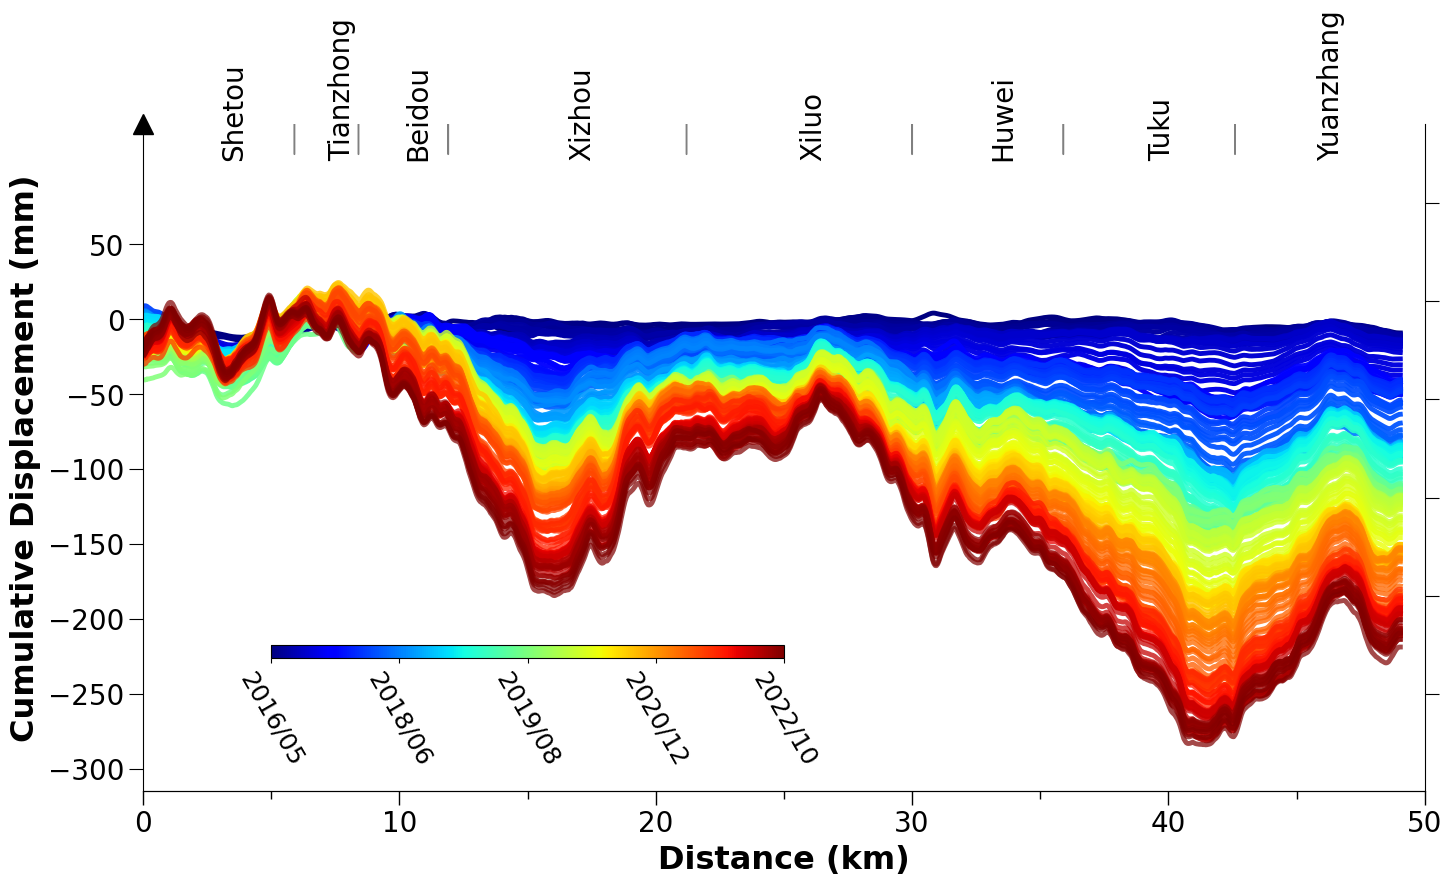

In [5]:
savefigure_option = "yes"
dot_per_inch = 1200

selected_datetime = PSC_average_cdis_data.columns[1:-1]

x_values_from_segment = [
    np.float64(segment.split("_")[-1]) / 1000 for segment in PSC_average_cdis_data["Segment"]
]

lw = 3.5
alpha = 1

# Define the Figure

## Style
plt.style.use("seaborn-v0_8-bright")
## Convert to centimeter
cm = 1 / 2.54
## Figure variable declaration
fig = plt.figure(figsize=[42 * cm, 22 * cm])
# fig = plt.figure(figsize=[11.7, 8.3])
## Subplot
ax = fig.add_subplot(111)
## I would like to add a Y-axis on the right side of the graph
ax2 = ax.twinx()

# An empty set to store all cumulative displacement value
# Later will be used for ylim
all_values = set()

# Plotting Quantity
plot_quantity, plot_unit = ["Cumulative Displacement", "(mm)"]

# = = = = = = = = = = = = = = = = = = = = = = = = = =
# - - - - - - - - - PLOT NAMES OF DISTRICTS AND ARROWS - - - -
# = = = = = = = = = = = = = = = = = = = = = = = = = =
for i in range(len(end_km)):
    km = round(end_km[i], 1)
    district = district_name[i]

    try:
        position = round(end_km[i] + (end_km[i + 1] - end_km[i]) / 2, 1)
    except:
        pass

    if (km > 0) and (km < end_km[-1] - 1):
        ax.arrow(
            x=km,
            y=110,
            dx=0,
            dy=200,
            width=0.02,
            head_width=0.02,
            fc="gray",
            ec="gray",
        )

    if type(district) == str:
        ax.text(
            x=position,
            y=110,
            s=district,
            rotation="vertical",
            fontweight="normal",
            fontsize=20,
        )


# = = = = = = = = = = = = = = = = = = = = = = = = = =
# - - - - - - - - - - - - - - - - GRAPH LABELS - - - - - - - - - - - - - - - -
# = = = = = = = = = = = = = = = = = = = = = = = = = =
# x label & y label
y_label = "{} {}".format(plot_quantity, plot_unit)
ax.set_ylabel(y_label, fontsize=23, labelpad=5, fontweight="bold")
ax.set_xlabel("Distance (km)", fontsize=23, labelpad=5, fontweight="bold")

# The length of Y ticks and Label Size
ax.tick_params(axis="y", which="major", labelsize=20, direction="out", length=10)
ax2.tick_params(axis="y", which="major", labelsize=20, direction="out", length=10)
# ax.tick_params(axis="y", which="minor", labelsize=20, direction="out", length=6)

# The length of X ticks and Label Size
ax.tick_params(axis="x", which="major", labelsize=20, direction="out", length=10, width=1)
ax.tick_params(axis="x", which="minor", labelsize=20, direction="out", length=6, width=1)

# Removing the default axis on right and top sides:
for side in ["right", "top"]:
    ax.spines[side].set_visible(False)

for side in ["left", "top"]:
    ax2.spines[side].set_visible(False)

# Define the intervals of X ticks
x_major_loc = plticker.MultipleLocator(base=10.0)
x_minor_loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(x_major_loc)
ax.xaxis.set_minor_locator(x_minor_loc)

# Define the intervals of Y ticks
y_major_loc = plticker.MultipleLocator(base=50.0)
y_minor_loc = plticker.MultipleLocator(base=10.0)
ax.yaxis.set_major_locator(y_major_loc)
# ax.yaxis.set_minor_locator(y_minor_loc)
ax2.yaxis.set_major_locator(y_major_loc)

# This is used to remove the label of the right-side Y axis
plt.setp(ax2.get_yticklabels(), visible=False)

# = = = = = = = = = = = = = = = = = = = = = = = = = =
# - - - - - - -  CUMULATIVE DISPLACEMENT LINES - - - - - - - - - -
# = = = = = = = = = = = = = = = = = = = = = = = = = =
# Colorbar
# Each color corresponding to a value
cmap = plt.get_cmap("jet")
count = 1

# Format-modified input datetime
modified_datetime = []

for datetime in selected_datetime[::]:

    # Because the datetime columns should have "N+date"
    # so that it can be used by ArcGIS
    # since ArcGIS can misunderstand the column with only numbers
    if "N" not in datetime:
        date_column = "N" + datetime
    else:
        date_column = datetime
        datetime = datetime[1:]

    # Add the datetime after modifying the format to empty list
    # This will be used to add the label for colorbar below
    modified_datetime.append(datetime)

    # Each color is corresponding to a value
    # This line is to control the plotting color
    color = cmap(float(count) / len(selected_datetime))

    # Extract the mean value & stdev
    # corresponding to each datetime and each HSR segment
    mean_values_from_column = PSC_average_cdis_data[date_column].values
    stdev_values_from_column = PSC_stdev_cdis_data[date_column].values

    # Append all values into one list
    # To find the maximum and minimum values
    # Can be use for top and bot of ylim
    all_values.update(mean_values_from_column)

    # Label for legends
    label = "/".join([datetime[:4], datetime[4:6], datetime[-2:]])

    # This is for drawing the area between two lines
    # Using ax.fill_between() function
    mean_minus_std = mean_values_from_column - stdev_values_from_column
    mean_plus_std = mean_values_from_column + stdev_values_from_column

    # Apply the Moving Average
    # To smooth the line
    MA_mean_values_from_column = get_moving_average(mean_values_from_column, window_size=7)

    # This is the most important line
    # To draw your fucking cumulative displacement
    ax.plot(
        x_values_from_segment,
        MA_mean_values_from_column,
        linestyle="-",
        marker=" ",
        color=color,
        linewidth=lw,
        alpha=alpha,
        label=label,
    )
    ax2.plot(
        x_values_from_segment,
        MA_mean_values_from_column,
        linestyle=" ",
        marker=" ",
        color="k",
        linewidth=1,
        alpha=0,
    )

    # lw -= 0.1
    alpha -= round((0.3 / len(selected_datetime)), 3)
    count += 1

# = = = = = = = = = = = = = = =
# - - - - - - -  LEGENDS - - - - - - - - - -
# = = = = = = = = = = = = = = =

handles, labels = ax.get_legend_handles_labels()
# ax.legend(
#     handles[::-1],
#     labels[::-1],
#     fontsize=16,
#     ncol=2,
#     frameon=False,
#     loc="lower left",
#     borderpad=0.15,
#     handletextpad=0.3,
#     labelspacing=0.1,
# )

# = = = = = = = = = = = = = = =
# - - - - - - -  COLOR BAR - - - - - - - - -
# = = = = = = = = = = = = = = =
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sm = plt.cm.ScalarMappable(cmap="jet", norm=plt.Normalize(vmin=0, vmax=1))
cbaxes = inset_axes(
    ax,
    width="20%",
    height="2%",
    loc="lower left",
    bbox_to_anchor=(0.1, 0.2, 2, 1),  # (x0, y0, width, height)
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(sm, cax=cbaxes, orientation="horizontal")
# cbar.ax.set_title("Time Range", fontsize=20, pad=10)
cbar.ax.set_xticks([0, 0.25, 0.5, 0.75, 1])

# These lines are for setting the color bar labels
# Labels have format YYYY/MM to show specific milestone in the time range

## A temporary variable to assign length of the datetime list
_len = len(modified_datetime)
## The function string_to_datetime return 2 values
## Only take the first value, as the datetime in string format
## Then only take the YYYY/MM part of the string
datestring_list = [
    string_to_datetime(modified_datetime[X])[0][:-3]
    for X in [-1, int(_len * 0.75), int(_len * 0.5), int(_len * 0.25), 0]
]
cbar.ax.set_xticklabels(datestring_list[::-1], fontsize=18, rotation=-60)

# = = = = = = = = = = = = = = = = = = =
# - - - - - - -  GRAPH X & Y LIMIT - - - - - - - - - -
# = = = = = = = = = = = = = = = = = = =

max_value = np.max(list(all_values))
min_value = np.min(list(all_values))

y_top = round_number(max_value) + 100
y_bot = round_number(min_value) - 25
ax.set_ylim(top=y_top, bottom=y_bot)
# ax.set_xlim(0, x_values_from_segment[-1])
ax.set_xlim(0, 50)

# = = = = = = = = = = = = = = = = = = =
# - - - - - - - - - -  GRAPH ARROWS - - - - - - - - -
# = = = = = = = = = = = = = = = = = = =
# Make arrows
# ax.plot(
#     (1),
#     (y_bot),
#     ls="",
#     marker=">",
#     ms=15,
#     color="k",
#     transform=ax.get_yaxis_transform(),
#     clip_on=False,
# )
ax.plot(
    (0),
    (1),
    ls="",
    marker="^",
    ms=15,
    color="k",
    transform=ax.get_xaxis_transform(),
    clip_on=False,
)

# = = = = = = = = = = = = = = = = = = =
# - - - - - - - - - -  SAVE FIGURES - - - - - - - - - - -
# = = = = = = = = = = = = = = = = = = =

for i in range(1, 1000):
    savename = "CDIS_AlongHSR_{}.png".format(str(i).zfill(3))
    savepath = os.path.join(folder2savefigure, savename)
    if os.path.exists(savepath):
        continue
    else:
        break

if savefigure_option.lower() in ["y", "yes"]:
    plt.savefig(
        os.path.join(savepath),
        dpi=dot_per_inch,
        transparent=False,
        facecolor="w",
        edgecolor="w",
        bbox_inches="tight",
    )
plt.show()